In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Importing the datasets
bbc = pd.read_csv(r"C:\Users\hansf\Documents\ADS_2020\DataWrangling\datasets\bbc.csv")
eteam = bbc = pd.read_csv(r"C:\Users\hansf\Documents\ADS_2020\DataWrangling\datasets\eteam.csv", encoding='iso8859_2')
game = pd.read_csv(r"C:\Users\hansf\Documents\ADS_2020\DataWrangling\datasets\game.csv")
goal = pd.read_csv(r"C:\Users\hansf\Documents\ADS_2020\DataWrangling\datasets\goal.csv", encoding='iso8859_2')
movies = pd.read_csv(r"C:\Users\hansf\Documents\ADS_2020\DataWrangling\datasets\movies.csv")
world = pd.read_csv(r"C:\Users\hansf\Documents\ADS_2020\DataWrangling\datasets\world.csv", encoding='iso8859_2')
nobel = pd.read_csv(r"C:\Users\hansf\Documents\ADS_2020\DataWrangling\datasets\nobel.csv", encoding='iso8859_2')

## Merging eteam, game, goal

In [24]:
#inspect coluns names of each table
eteam.head()

id        teamname             coach
0  POL          Poland  Franciszek Smuda
1  RUS          Russia     Dick Advocaat
2  CZE  Czech Republic      Michal Bílek
3  GRE          Greece   Fernando Santos
4  NED     Netherlands  Bert van Marwijk

In [25]:
goal.head()

matchid teamid                player  gtime
0     1001    POL    Robert Lewandowski     17
1     1001    GRE  Dimitris Salpingidis     51
2     1002    RUS          Alan Dzagoev     15
3     1002    RUS        Roman Shirokov     24
4     1002    CZE          Václav Pilar     52

In [28]:
game.head()

id      mdate                    stadium team1 team2
0  1001   8-Jun-12   National Stadium, Warsaw   POL   GRE
1  1002   8-Jun-12  Stadion Miejski (Wroclaw)   RUS   CZE
2  1003  12-Jun-12  Stadion Miejski (Wroclaw)   GRE   CZE
3  1004  12-Jun-12   National Stadium, Warsaw   POL   RUS
4  1005  16-Jun-12  Stadion Miejski (Wroclaw)   CZE   POL

In [34]:
#merge first game and goal on ID and Matchid then, with eteam on Id and teamID
first = pd.merge(game,goal, left_on="id", right_on="matchid")


In [36]:
first.head()

id     mdate                    stadium team1 team2  matchid teamid  \
0  1001  8-Jun-12   National Stadium, Warsaw   POL   GRE     1001    POL   
1  1001  8-Jun-12   National Stadium, Warsaw   POL   GRE     1001    GRE   
2  1002  8-Jun-12  Stadion Miejski (Wroclaw)   RUS   CZE     1002    RUS   
3  1002  8-Jun-12  Stadion Miejski (Wroclaw)   RUS   CZE     1002    RUS   
4  1002  8-Jun-12  Stadion Miejski (Wroclaw)   RUS   CZE     1002    CZE   

                 player  gtime  
0    Robert Lewandowski     17  
1  Dimitris Salpingidis     51  
2          Alan Dzagoev     15  
3        Roman Shirokov     24  
4          Václav Pilar     52

In [41]:
complete = pd.merge(first, eteam, left_on='teamid', right_on='id') #notice that ID change to id_x and id_y because have the same name ( in fact it is not a good merge because only shows information about team1)
complete.head()

id_x      mdate                    stadium team1 team2  matchid teamid  \
0  1001   8-Jun-12   National Stadium, Warsaw   POL   GRE     1001    POL   
1  1004  12-Jun-12   National Stadium, Warsaw   POL   RUS     1004    POL   
2  1001   8-Jun-12   National Stadium, Warsaw   POL   GRE     1001    GRE   
3  1003  12-Jun-12  Stadion Miejski (Wroclaw)   GRE   CZE     1003    GRE   
4  1006  16-Jun-12   National Stadium, Warsaw   GRE   RUS     1006    GRE   

                 player  gtime id_y teamname             coach  
0    Robert Lewandowski     17  POL   Poland  Franciszek Smuda  
1  Jakub Blaszczykowski     57  POL   Poland  Franciszek Smuda  
2  Dimitris Salpingidis     51  GRE   Greece   Fernando Santos  
3       Theofanis Gekas     53  GRE   Greece   Fernando Santos  
4    Giorgos Karagounis     45  GRE   Greece   Fernando Santos

In [49]:
#Put team name of the team2 as well
complete_v2 = pd.merge(complete,eteam, left_on='team2', right_on='id')
complete_v2.head()

id_x      mdate                   stadium team1 team2  matchid teamid  \
0  1001   8-Jun-12  National Stadium, Warsaw   POL   GRE     1001    POL   
1  1001   8-Jun-12  National Stadium, Warsaw   POL   GRE     1001    GRE   
2  1026  22-Jun-12          PGE Arena Gdansk   GER   GRE     1026    GRE   
3  1026  22-Jun-12          PGE Arena Gdansk   GER   GRE     1026    GRE   
4  1026  22-Jun-12          PGE Arena Gdansk   GER   GRE     1026    GER   

                 player  gtime id_y teamname_x           coach_x   id  \
0    Robert Lewandowski     17  POL     Poland  Franciszek Smuda  GRE   
1  Dimitris Salpingidis     51  GRE     Greece   Fernando Santos  GRE   
2      Georgios Samaras     55  GRE     Greece   Fernando Santos  GRE   
3  Dimitris Salpingidis     89  GRE     Greece   Fernando Santos  GRE   
4          Philipp Lahm     39  GER    Germany       Joachim Löw  GRE   

  teamname_y          coach_y  
0     Greece  Fernando Santos  
1     Greece  Fernando Santos  
2     Greece  Fernando Santos  
3     Greece  Fernando Santos  
4     Greece  Fernando Santos

In [55]:
#rename the field to better understanding
complete_v2.rename(columns={"id_y": "id_team_1", "teamname_x": "teamname_1", 'coach_x': "coach_1"}, inplace=True)
complete_v2.rename(columns={"id":"id_team_2", "teamname_y": "teamname_2", "coach_y": "coach_2"},inplace=True)

#dropping columns with same information and different names
complete_v2.drop(columns=['id_x',"id_team_1", "id_team_2"],inplace=True)
complete_v2.head()

mdate                   stadium team1 team2  matchid teamid  \
0   8-Jun-12  National Stadium, Warsaw   POL   GRE     1001    POL   
1   8-Jun-12  National Stadium, Warsaw   POL   GRE     1001    GRE   
2  22-Jun-12          PGE Arena Gdansk   GER   GRE     1026    GRE   
3  22-Jun-12          PGE Arena Gdansk   GER   GRE     1026    GRE   
4  22-Jun-12          PGE Arena Gdansk   GER   GRE     1026    GER   

                 player  gtime teamname_1           coach_1 teamname_2  \
0    Robert Lewandowski     17     Poland  Franciszek Smuda     Greece   
1  Dimitris Salpingidis     51     Greece   Fernando Santos     Greece   
2      Georgios Samaras     55     Greece   Fernando Santos     Greece   
3  Dimitris Salpingidis     89     Greece   Fernando Santos     Greece   
4          Philipp Lahm     39    Germany       Joachim Löw     Greece   

           coach_2  
0  Fernando Santos  
1  Fernando Santos  
2  Fernando Santos  
3  Fernando Santos  
4  Fernando Santos

## What is the avg of reviews by country?

In [57]:
#group in contries and get the avg of the revies | Sort the values
movies_sorted = movies['imdb_score'].groupby(movies['country']).mean().sort_values()
movies_sorted

country
New Line                4.400000
Bahamas                 4.400000
Aruba                   4.800000
Peru                    5.400000
Cambodia                5.600000
Georgia                 5.600000
Switzerland             5.750000
South Korea             5.845455
Russia                  5.877778
Belgium                 5.966667
Slovakia                6.000000
Thailand                6.080000
Bulgaria                6.100000
Canada                  6.175294
Germany                 6.209639
India                   6.289474
Official site           6.300000
USA                     6.373327
Slovenia                6.400000
Romania                 6.433333
Australia               6.444186
Hungary                 6.450000
China                   6.625926
Netherlands             6.633333
South Africa            6.650000
France                  6.696063
Greece                  6.700000
Hong Kong               6.706667
Ireland                 6.777778
UK                      6.781197
Sp

In [5]:
# only movies > 7,5 on avg
movies_top = movies_sorted[movies_sorted>7.5] 

Text(0.5, 1.0, 'Avg Reviews by Contry')

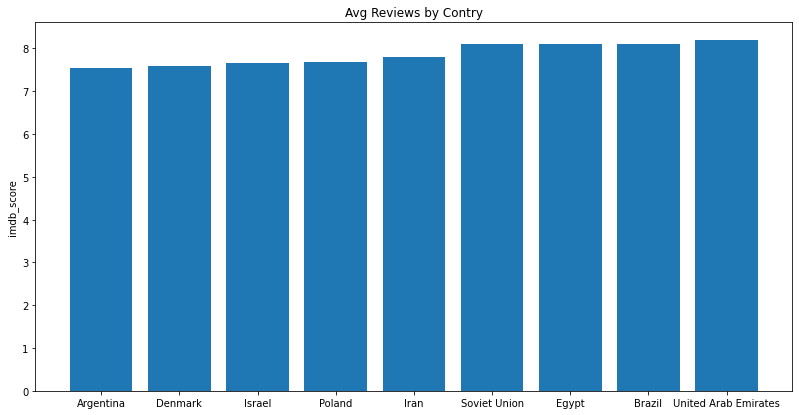

In [6]:
# This example fits a4 paper with 5mm margin printers

# figure settings
figure_width = 28.7 # cm
figure_height = 15 # cm
left_right_magrin = 1 # cm
top_bottom_margin = 1 # cm

# Don't change
left   = left_right_magrin / figure_width # Percentage from height
bottom = top_bottom_margin / figure_height # Percentage from height
width  = 1 - left*2
height = 1 - bottom*2
cm2inch = 1/2.54 # inch per cm

# specifying the width and the height of the box in inches
fig = plt.figure(figsize=(figure_width*cm2inch,figure_height*cm2inch))
ax = fig.add_axes((left, bottom, width, height))

x = movies_top.index
y = movies_top.values
ax.bar(x,y)
# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel(movies_top.name)
ax.set_title('Avg Reviews by Contry')



## Which are the top 10 movies? 

In [7]:
#group in movie title, pick the sum of the scores and sort
movies['imdb_score'].groupby(movies['movie_title']).mean()

movie_title
10 Cloverfield Lane            7.3
10 Days in a Madhouse          7.5
10 Things I Hate About You     7.2
10,000 B.C.                    7.2
102 Dalmatians                 4.8
                              ... 
[Rec]                          7.5
eXistenZ                       6.8
xXx: State of the Union        4.3
xXx                            5.8
Æon Flux                       5.5
Name: imdb_score, Length: 3926, dtype: float64

In [8]:
movies_sorted = movies['imdb_score'].groupby(movies['movie_title']).mean().sort_values()
movies_sorted = pd.DataFrame(movies_sorted) # sort the values
movies_sorted.reset_index() #clear index

movie_title  imdb_score
0     Justin Bieber: Never Say Never          1.6
1                         Foodfight!          1.7
2                     Disaster Movie          1.9
3       Superbabies: Baby Geniuses 2          1.9
4                    United Passions          2.0
...                               ...         ...
3921                 The Dark Knight          9.0
3922             Dekalog                      9.1
3923            Kickboxer: Vengeance          9.1
3924        The Shawshank Redemption          9.3
3925    Towering Inferno                      9.5

[3926 rows x 2 columns]

In [9]:
#show only the 10 best reviews
movies_sorted[-11:-1]

imdb_score
movie_title                                                
Daredevil                                               8.8
Star Wars: Episode V - The Empire Strikes Back          8.8
It's Always Sunny in Philadelphia                       8.8
The Lord of the Rings: The Return of the King           8.9
Schindler's List                                        8.9
The Godfather: Part II                                  9.0
The Dark Knight                                         9.0
Dekalog                                                 9.1
Kickboxer: Vengeance                                    9.1
The Shawshank Redemption                                9.3

In [17]:
movies

color      director_name  num_critic_for_reviews  duration  \
0                Color      James Cameron                   723.0     178.0   
1                Color     Gore Verbinski                   302.0     169.0   
2                Color         Sam Mendes                   602.0     148.0   
3                Color  Christopher Nolan                   813.0     164.0   
4                  NaN        Doug Walker                     NaN       NaN   
...                ...                ...                     ...       ...   
3995             Color        Brett Piper                    18.0      80.0   
3996             Color    Morgan Spurlock                   193.0     100.0   
3997             Color      Brandon Trost                    66.0      82.0   
3998             Color       Joe Swanberg                    65.0      82.0   
3999   Black and White       Joseph Green                    95.0      70.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
3995                      7.0                     3.0   Steve Diasparra   
3996                    293.0                     0.0    Amanda Kearsan   
3997                     32.0                   128.0       Sean Whalen   
3998                    217.0                   442.0       Lena Dunham   
3999                      2.0                     6.0       Jason Evers   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      131.0          NaN                      Documentary   
...                      ...          ...                              ...   
3995                   118.0          NaN           Action|Sci-Fi|Thriller   
3996                     0.0   11529368.0         Comedy|Documentary|Drama   
3997                   968.0      40557.0                           Comedy   
3998                 10000.0      30084.0                     Comedy|Drama   
3999                    24.0          NaN                    Horror|Sci-Fi   

      ... num_user_for_reviews language  country  content_rating       budget  \
0     ...               3054.0  English      USA           PG-13  237000000.0   
1     ...               1238.0  English      USA           PG-13  300000000.0   
2     ...                994.0  English       UK           PG-13  245000000.0   
3     ...               2701.0  English      USA           PG-13  250000000.0   
4     ...                  NaN      NaN      NaN             NaN          NaN   
...   ...                  ...      ...      ...             ...          ...   
3995  ...                 18.0  English      USA             NaN      75000.0   
3996  ...                404.0  English      USA              PG      65000.0   
3997  ...                 22.0  English      USA               R      60000.0   
3998  ...                 23.0  English      USA               R      70000.0   
3999  ...                152.0  English      USA        Approved      62000.0   

      title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0         2009.0                  936.0        7.9          1.78   
1         2007.0                 5000.0        7.1          2.35   
2         2015.0                  393.0        6.8   

In [67]:
#filter movies rating > MEAN
movies[movies['imdb_score']>(movies['imdb_score'].mean())]

color      director_name  num_critic_for_reviews  duration  \
0                Color      James Cameron                   723.0     178.0   
1                Color     Gore Verbinski                   302.0     169.0   
2                Color         Sam Mendes                   602.0     148.0   
3                Color  Christopher Nolan                   813.0     164.0   
4                  NaN        Doug Walker                     NaN       NaN   
...                ...                ...                     ...       ...   
3989             Color       Jason Miller                     5.0      77.0   
3990             Color     Dennis Iliadis                   241.0     114.0   
3991             Color         Sut Jhally                    16.0      80.0   
3992   Black and White   Darren Aronofsky                   138.0      84.0   
3996             Color    Morgan Spurlock                   193.0     100.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
3989                      0.0                     0.0  Dottie Alexander   
3990                     29.0                   616.0     Monica Potter   
3991                      3.0                     0.0     Seth Ackerman   
3992                      0.0                   194.0     Clint Mansell   
3996                    293.0                     0.0    Amanda Kearsan   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      131.0          NaN                      Documentary   
...                      ...          ...                              ...   
3989                    45.0          NaN      Biography|Documentary|Music   
3990                   956.0   32721635.0            Crime|Horror|Thriller   
3991                   103.0          NaN                      Documentary   
3992                  1000.0    3216970.0           Drama|Mystery|Thriller   
3996                     0.0   11529368.0         Comedy|Documentary|Drama   

      ... num_user_for_reviews language  country  content_rating       budget  \
0     ...               3054.0  English      USA           PG-13  237000000.0   
1     ...               1238.0  English      USA           PG-13  300000000.0   
2     ...                994.0  English       UK           PG-13  245000000.0   
3     ...               2701.0  English      USA           PG-13  250000000.0   
4     ...                  NaN      NaN      NaN             NaN          NaN   
...   ...                  ...      ...      ...             ...          ...   
3989  ...                  1.0  English      USA         Unrated     100000.0   
3990  ...                279.0  English      USA               R   15000000.0   
3991  ...                 13.0  English      USA             NaN      70000.0   
3992  ...                586.0  English      USA               R      60000.0   
3996  ...                404.0  English      USA              PG      65000.0   

      title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0         2009.0                  936.0        7.9          1.78   
1         2007.0                 5000.0        7.1          2.35   
2         2015.0                  393.0        6.8   

In [54]:
#average score rating by director!
movies.loc[:, ['director_name','movie_title', 'imdb_score', 'num_voted_users','title_year']].groupby(movies['director_name']).mean()

imdb_score  num_voted_users   title_year
director_name                                               
Aaron Hann            6.000000     13279.000000  2015.000000
Aaron Seltzer         2.700000     50415.000000  2006.000000
Abel Ferrara          6.600000      6921.000000  1996.000000
Adam Goldberg         5.400000      1618.000000  2003.000000
Adam McKay            6.916667    185868.666667  2009.333333
...                        ...              ...          ...
Zackary Adler         5.000000      1510.000000  2015.000000
Zal Batmanglij        6.800000     28815.500000  2012.000000
Zoran Lisinac         7.100000       330.000000  2013.000000
Álex de la Iglesia    6.100000     22753.000000  2008.000000
Émile Gaudreault      6.700000      5548.000000  2003.000000

[1892 rows x 3 columns]

In [68]:
# Select movies with Content Rating == 13 years, return likes from actors and budget
movies.loc[movies['content_rating'] == "PG-13", ['actor_1_facebook_likes', 'actor_3_facebook_likes', 'budget']]

actor_1_facebook_likes  actor_3_facebook_likes       budget
0                     1000.0                   855.0  237000000.0
1                    40000.0                  1000.0  300000000.0
2                    11000.0                   161.0  245000000.0
3                    27000.0                 23000.0  250000000.0
5                      640.0                   530.0  263700000.0
...                      ...                     ...          ...
3945                   574.0                   259.0     100000.0
3949                   376.0                   184.0     150000.0
3954                    52.0                    21.0          NaN
3967                    17.0                     NaN     125000.0
3979                  1000.0                   545.0          NaN

[1300 rows x 3 columns]

In [42]:
#Filter director name and num critics with num cricts > 100 and < 300
movies[["director_name", "num_critic_for_reviews"]][movies["num_critic_for_reviews"]>100][movies["num_critic_for_reviews"]<300]

<ipython-input-42-bf828649f9ff>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies[["director_name", "num_critic_for_reviews"]][movies["num_critic_for_reviews"]>100][movies["num_critic_for_reviews"]<300]


director_name  num_critic_for_reviews
16      Andrew Adamson                   258.0
24         Chris Weitz                   251.0
55          Peter Sohn                   298.0
59        Brett Ratner                   162.0
61     Robert Zemeckis                   240.0
...                ...                     ...
3976       David Lynch                   152.0
3983         E.L. Katz                   193.0
3990    Dennis Iliadis                   241.0
3992  Darren Aronofsky                   138.0
3996   Morgan Spurlock                   193.0

[1833 rows x 2 columns]

## Exercises

In [ ]:
#Question 1